# Disease Prediction using Machine Learning Algorithms

### Importing Libraries

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report


### Loading Data

#### Main Dataset

In [157]:
df = pd.read_csv('../disease-symptom-description-dataset/dataset.csv')
print(df.head())


            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

#### Symptom Severity Dataset

In [158]:
df1 = pd.read_csv('../disease-symptom-description-dataset/Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


#### Symptom Description Dataset

In [159]:
df2 = pd.read_csv('../disease-symptom-description-dataset/symptom_Description.csv')
print(df2.head())

          Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...


#### Symptom Precaution Dataset

In [160]:
df3 = pd.read_csv('../disease-symptom-description-dataset/symptom_precaution.csv')
print(df3.head())

          Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths  


#### List of Diseases

In [161]:
diseases = set(df['Disease'])

print(diseases)
print('\n There are {} diseases described in the dataset'.format(len(diseases)))



{'Migraine', 'Common Cold', 'Hepatitis E', 'AIDS', 'Chronic cholestasis', 'Drug Reaction', 'Jaundice', 'Chicken pox', 'Pneumonia', 'Heart attack', 'Typhoid', 'Hyperthyroidism', 'Bronchial Asthma', 'Hypothyroidism', 'Hypertension ', '(vertigo) Paroymsal  Positional Vertigo', 'Paralysis (brain hemorrhage)', 'hepatitis A', 'Malaria', 'Alcoholic hepatitis', 'Gastroenteritis', 'Dimorphic hemmorhoids(piles)', 'Varicose veins', 'Urinary tract infection', 'Hepatitis C', 'Tuberculosis', 'Peptic ulcer diseae', 'Allergy', 'Diabetes ', 'Hypoglycemia', 'Hepatitis D', 'Psoriasis', 'Dengue', 'Osteoarthristis', 'Arthritis', 'Hepatitis B', 'Impetigo', 'Fungal infection', 'Acne', 'GERD', 'Cervical spondylosis'}

 There are 41 diseases described in the dataset


#### List of symptoms

In [162]:
symptoms = set(df.iloc[:,1:].values.flatten())

print(symptoms)
print('\nThere are {} symptoms described in the dataset'.format(len(symptoms) - 1))

{nan, ' knee_pain', ' mood_swings', ' rusty_sputum', ' extra_marital_contacts', ' fluid_overload', ' bloody_stool', ' loss_of_balance', ' excessive_hunger', ' chills', ' phlegm', ' yellowing_of_eyes', ' redness_of_eyes', ' weakness_of_one_body_side', ' blood_in_sputum', ' stomach_bleeding', ' spinning_movements', ' sinus_pressure', ' back_pain', ' pain_behind_the_eyes', ' movement_stiffness', ' abnormal_menstruation', ' burning_micturition', ' acute_liver_failure', ' neck_pain', ' brittle_nails', ' obesity', ' diarrhoea', ' dizziness', ' loss_of_smell', ' small_dents_in_nails', ' muscle_pain', ' congestion', ' receiving_blood_transfusion', ' continuous_feel_of_urine', ' ulcers_on_tongue', ' continuous_sneezing', 'itching', ' depression', ' joint_pain', ' sunken_eyes', ' stomach_pain', ' family_history', ' skin_rash', ' mucoid_sputum', ' cough', ' receiving_unsterile_injections', ' irregular_sugar_level', ' lack_of_concentration', ' cramps', ' breathlessness', ' bladder_discomfort', ' n

### Data Preprocessing

##### Handling Missing data

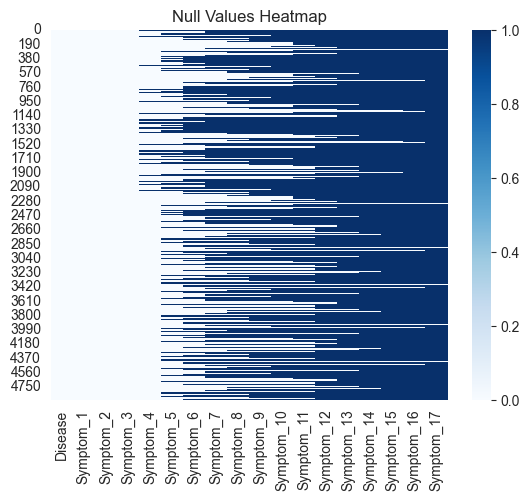

In [163]:
sns.heatmap(df.isnull(), cmap='Blues')
plt.title('Null Values Heatmap')
plt.show()


In [164]:
df.isnull().sum()


Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [165]:
df = df.apply(lambda x: x.str.strip() )
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.lower() )
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(' ', ''))

df = df.fillna(0)

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


##### Encoding  the symptoms with their severity weight

In [166]:
# Create a dictionary mapping each symptom to its severity
severity_map = dict(zip(df1['Symptom'], df1['weight']))

# replace the symptoms  with their severity
encoded_df = df.replace(severity_map)

encoded_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


#### Storing the diseases and encoded symptoms in seperate dataframes

In [167]:
cols = df.columns

(encoded_df[cols] == 0).all()

encoded_df['Disease'].value_counts()

encoded_df['Disease'].unique()

data = encoded_df.iloc[:,1:].values
labels = encoded_df['Disease'].values



#### Splitting the data 


In [168]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,  train_size = 0.70, shuffle=True, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3444, 17) (1476, 17) (3444,) (1476,)


### Model Training and Testing

####  Random Forest Classifier

Accuracy% = 99.32249322493224


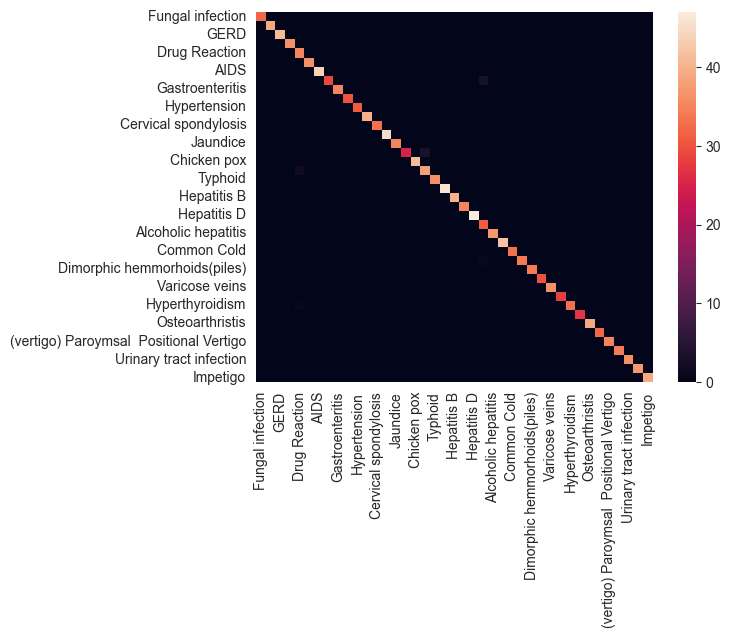

In [169]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
result = rfc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

rfc_score = accuracy_score(y_test, result) * 100

print('Accuracy% =', rfc_score)


#### Decision Tree Classifier

Accuracy% = 99.32249322493224


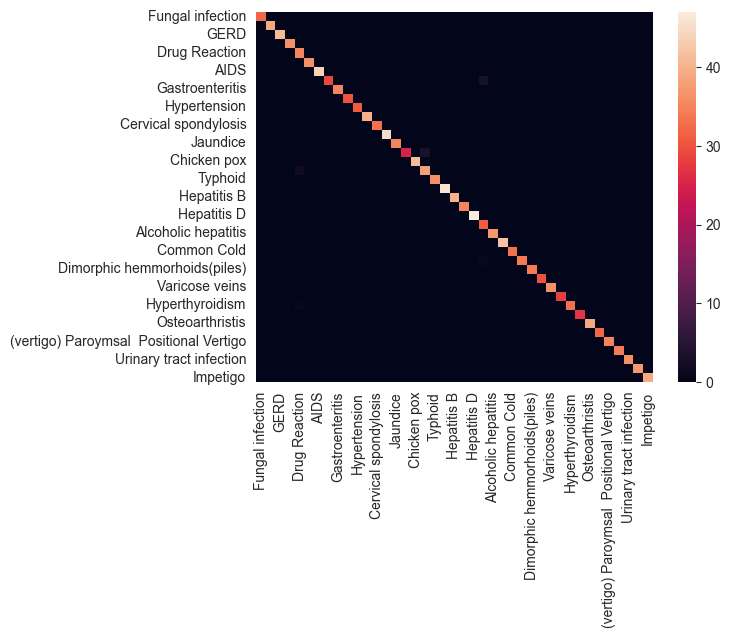

In [170]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
result = dtc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

dtc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', dtc_score)

#### Naives Bayes Classifier

Accuracy% = 85.84010840108401


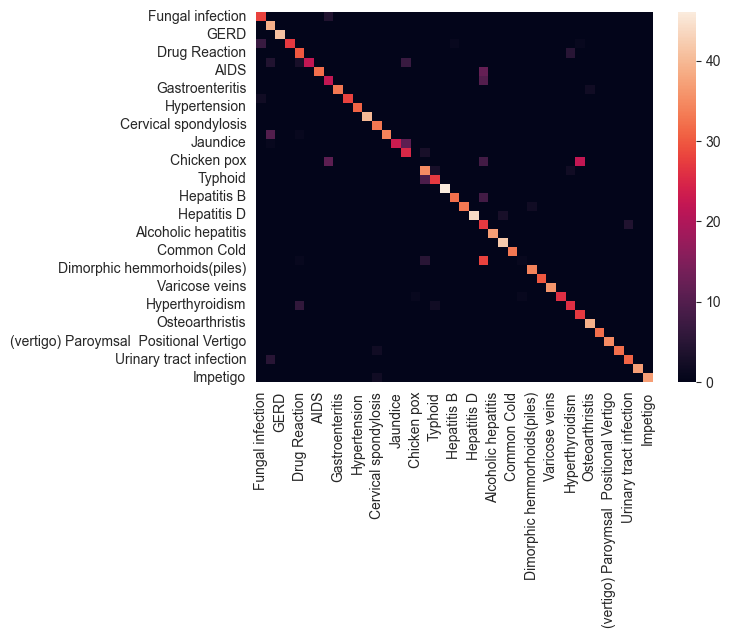

In [171]:
nbc = GaussianNB()
nbc.fit(x_train, y_train)
result = nbc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

nbc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', nbc_score)


#### K-Nearest Neighbors Classifier

Accuracy% = 99.1869918699187


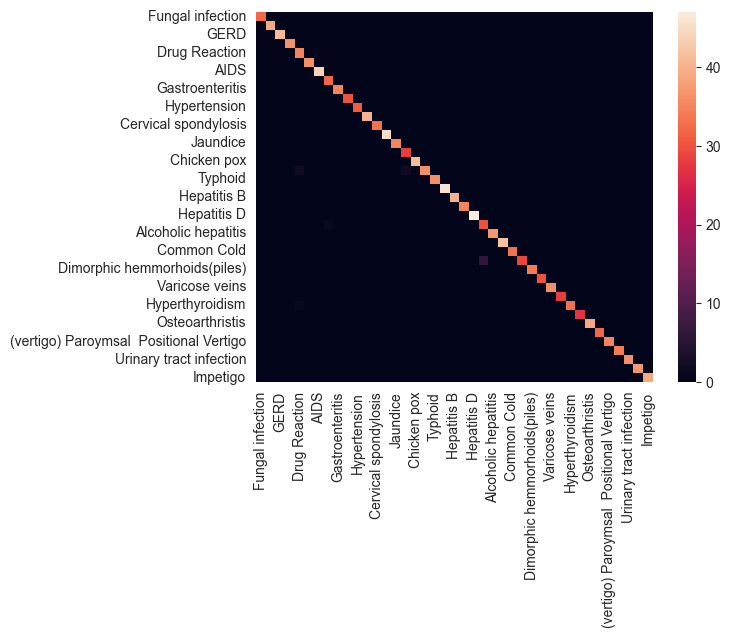

In [172]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
result = knc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

knc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', knc_score)

#### Support Vector Classifier

Accuracy% = 91.32791327913279


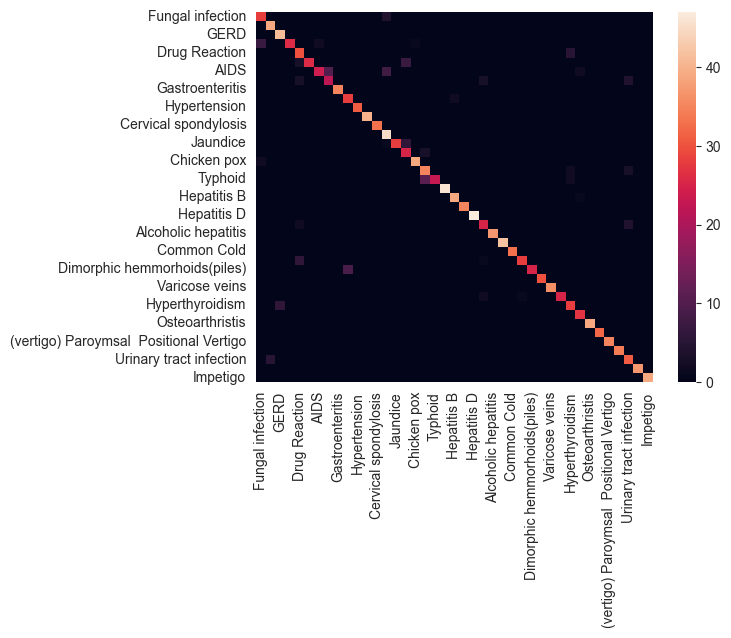

In [173]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
result = svc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

svc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', svc_score)

#### Comparing the accuracy of all the models

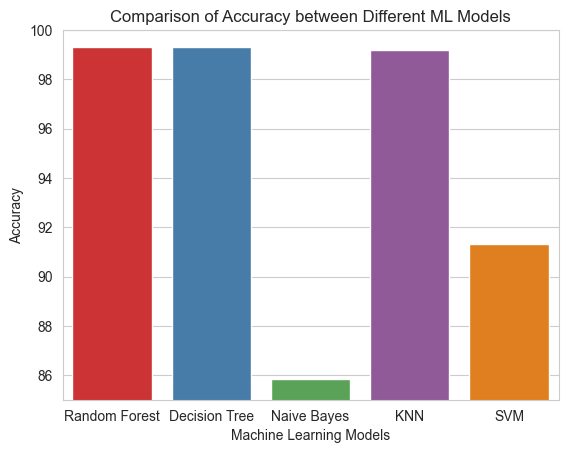

In [174]:
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'KNN', 'SVM']
accuracies = [rfc_score, dtc_score, nbc_score, knc_score, svc_score]

sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.barplot(x=models, y=accuracies)

plt.ylim(85, 100)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy between Different ML Models")
plt.show()


### Making Predictions

In [199]:
def predict_disease(symptoms_list,model,top_k=5):
    # Encode the symptoms based on their severity
    encoded_symptoms = [severity_map[symptom] for symptom in symptoms_list]
    
    for i  in range(len(encoded_symptoms),17):
        encoded_symptoms.append(0)
        
    # Create a numpy array from the encoded symptoms
    symptoms_array = np.array(encoded_symptoms).reshape(1,-1)
 
     # Use the trained model to predict the probabilities of all diseases
    disease_probs = model.predict_proba(symptoms_array)[0]
    
    # Sort the predicted probabilities in descending order
    sorted_probs_idx = np.argsort(disease_probs)[::-1]
    
    # Get the top-k predicted diseases and their probabilities
    top_k_diseases = [(model.classes_[idx], disease_probs[idx]) for idx in sorted_probs_idx[:top_k]]
    
    return top_k_diseases

In [201]:
def output_predicted_diseases(symptoms_list,model,top_k=5):
    top_k_diseases = predict_disease(symptoms_list,model,top_k)
    
    print('The predicted disease is {} with probability {:.2f}%\n'.format(top_k_diseases[0][0], top_k_diseases[0][1]*100))
    
    print(top_k_diseases)

    predict_diseases = [disease[0] for disease in top_k_diseases]
    
    predict_probs = [disease[1] for disease in top_k_diseases]
    
    sns.set_style("whitegrid")
    sns.set_palette("Set1")
    sns.barplot(x=predict_diseases, y=predict_probs)
    

    plt.xlabel("Different Diseases")
    plt.ylabel("Probability")
    plt.title("Predicted Diseases and their Probabilities")
    plt.tight_layout()
    plt.show()


The predicted disease is Fungal infection with probability 66.00%

[('Fungal infection', 0.66), ('Chronic cholestasis', 0.1), ('Psoriasis', 0.06), ('Heart attack', 0.06), ('Paralysis (brain hemorrhage)', 0.05)]


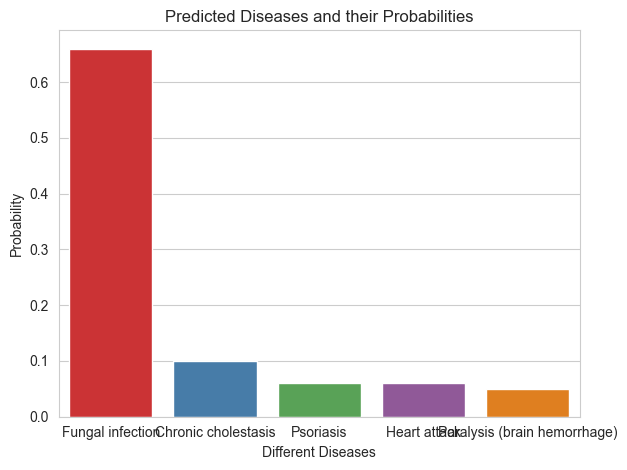

In [203]:
symptoms = [ 'itching', 'skin_peeling' , 'skin_rash']

output_predicted_diseases(symptoms,rfc)
      